#**Thai sentiment analysis about education in Thailand on Twitter.** 🙂😐☹️

# **Data Collection** 🐻 🐼 🐻‍❄️

ขั้นตอนในการเก็บรวบรวมข้อมูลมีดังนี้   
🤑 [Data collection](https://colab.research.google.com/drive/17Tc2BoZezzSDpPOQVLr4Jwmf_YxcQ166?usp=sharing)

# **Data pre-processing** 🪅

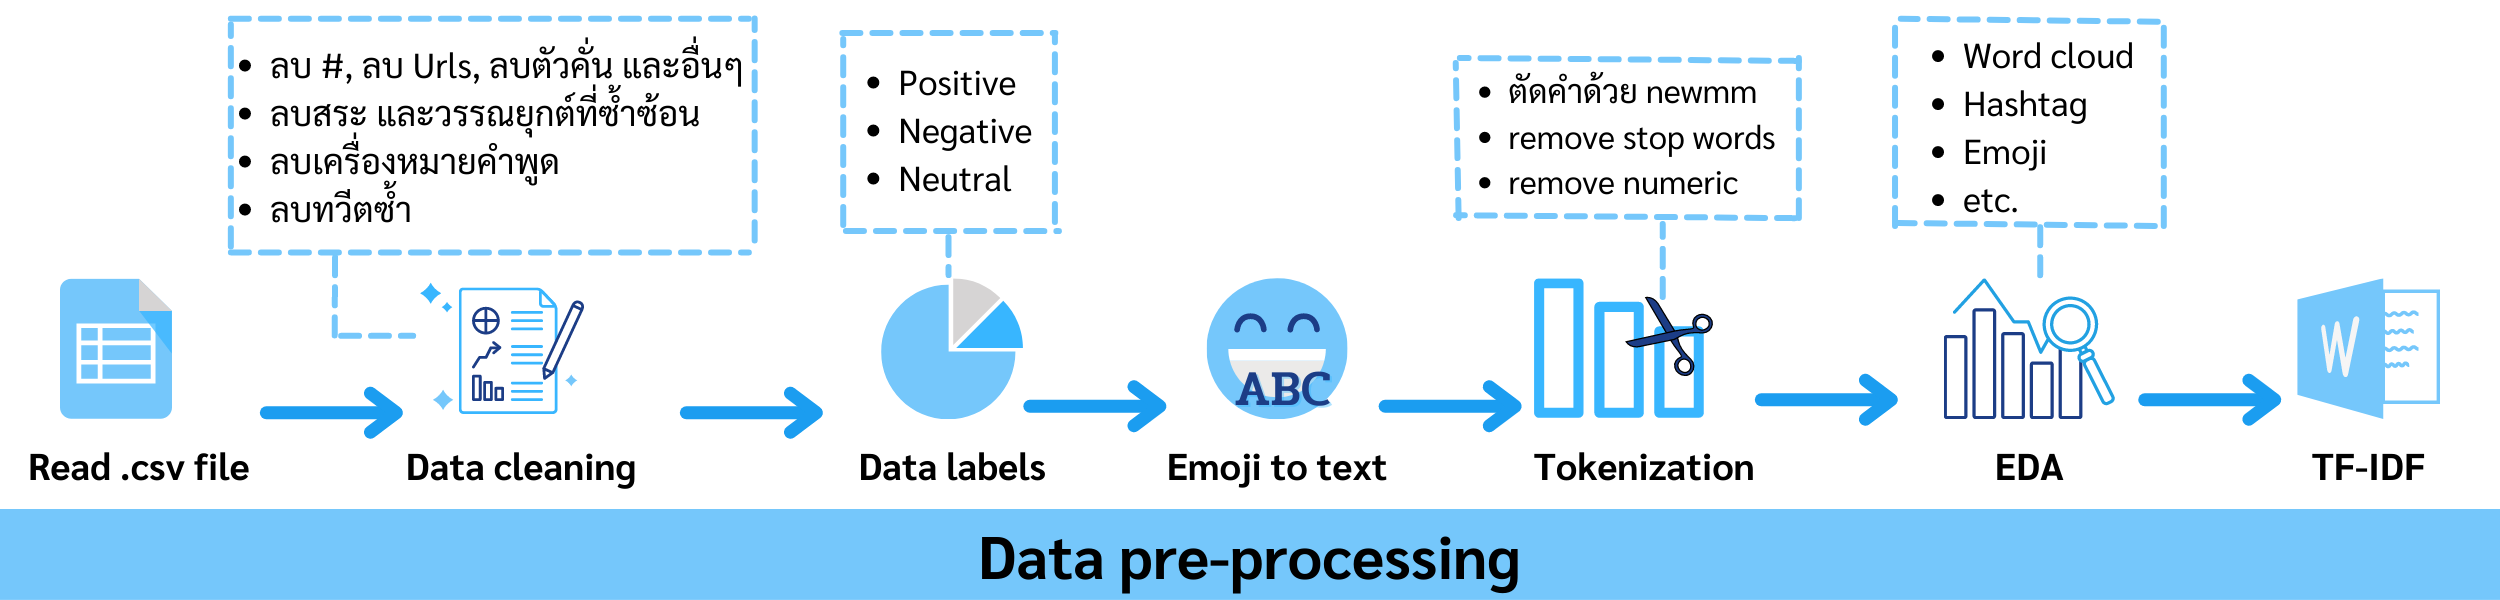


### การนำเข้าแพ็คเกจที่จำเป็น

In [1]:
# install module
!pip install pythainlp
!pip install python-crfsuite
!pip install stop-words
!pip install stopwords
!pip install emoji

     |████████████████████████████████| 11.5 MB 6.4 MB/s 
     |████████████████████████████████| 965 kB 5.2 MB/s 
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=08fd1f3815f5a257272c15ddc27ec307ec4df4109139493345e12669d3b974db
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words
     |████████████████████████████████| 175 kB 4.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1b1f6d54d2fa2b1ef94457473148fbdac58b3625e5f30c340c20f2de99da01a3
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [2]:
import pandas as pd
import tweepy as tw
import numpy as np 

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

### อ่านไฟล์ข้อมูลที่รวบรวมมา

In [3]:
# ดาวน์โหลดไฟล์จาก google drive
!gdown --id 1zF-8hc7PO5cbgC8GMIPHD5_H4CSCwJ7o
!unzip Info.zip

Downloading...
From: https://drive.google.com/uc?id=1zF-8hc7PO5cbgC8GMIPHD5_H4CSCwJ7o
To: /content/Info.zip
100% 2.71M/2.71M [00:00<00:00, 196MB/s]
Archive:  Info.zip
  inflating: Data new n label.csv    
  inflating: label.pkl               
  inflating: label_new.pkl           
  inflating: New data.csv            
  inflating: Readme.txt              
  inflating: Sarabun-Thin.ttf        
  inflating: TFIDF.pkl               
  inflating: TFIDF_new.pkl           


[คำอธิบายในแต่ละ attribute](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)   
โดย describtion หมายถึง tweet.text เป็นข้อความที่ผู้ใช้ทวีต   
   
   
   ปล. กระบวนการในขั้นตอนการเตรียมข้อมูลได้เป็นไปดังภาพ การอ่านข้อมูลเป็นข้อมูลที่เลเบลไว้แล้ว หากแต่แสดงให้เห็นกระบวนในการทำงานให้ดูตามขั้นตอน


In [ ]:
import pandas as pd
train = pd.read_csv("Data new n label.csv")
train.head()

,category,description
0,neu,กระแส #เรียนออนไลน์ ยังทำให้ดีมานด์ iPad รุ่นต...
1,neu,ภูมิศาสตร์ กับ ประวัติศาสตร์ \n\nเป็น ทวีป เหม...
2,pos,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ #...
3,neg,อ่านข่าวนิสิตเครียดจน #ฆ่าตัวตาย เพราะ #เรียนอ...
4,neu,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้\n\nY...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     6098 non-null   object
 1   description  6098 non-null   object
dtypes: object(2)
memory usage: 95.4+ KB


# Data cleanning 

In [ ]:
## ฟังก์ชันการทำความสะอาดข้อมูล
import re
import string
def CleaningTexts(text):
    
    # ลบ @
    text = re.sub(r'@\S+','',text)
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด เช่น <br>
    text = re.sub(r'<.*?>','', text)
    
    # ลบ url
    text = re.sub(r'https*\S+','',text)
    
    # ลบ &lt;และ &gt;
    text = re.sub(r'&lt;','',text)
    text = re.sub(r'&gt;','',text)
    
    # ลบ #
    text = re.sub(r'#\S+','',text)

    # ไม้ยมก
    text = re.sub(r'[\ๆ]','',text)

    # ลบเครื่องหมายคำพูด (punctuation)
    text = re.sub(r'[\!\"\$\%\&\'\(\)\*\+\,\-\:\;\<\=\>\?\@\[\]\^\_\`\{\|\}\~]','',text)
    #for punc in string.punctuation:
    #  text = re.sub(r'\{}'.format(punc),'',text)
    
    # ลบอื่นๆ
    text = re.sub(r'["/\○\…\“\”\ㅋ\—\ಥ\꒱\﹆\₊\˚\ˑ\‘\’\฿\_\•\ㅠ\╭\∩\╮\ಠ\\ʕ\ε\ʔ\ㅠ\ノ\｀\д\´\彡\┻\━\益\→\◖\ᴥ\⚆\╯\︵\╰\⦿\д\◗"]','',text)
    
    # ลบ separator เช่น \n \t
    text = ' '.join(text.split())

    return text

In [ ]:
# ลบข้อมูลที่ซ้ำกันออก
train.drop_duplicates(inplace = True)

# ทำความสะอาดข้อมูล
train["clean"] = train['description'].apply(CleaningTexts)

# แปลงตัวอักษรภาษาอังกฤษพิมพ์ใหญ่ให้เป็นตัวพิมพ์เล็ก ex. A -> a
train["clean"] = train["clean"].apply(lambda x: "".join([w.lower() for w in x]))

from pythainlp.util import normalize
# ลบสระ และวรรณยุกต์ที่ซ้ำซ้อน
train["clean"] = train["clean"].apply(normalize)

train.head()

,category,description,clean
0,neu,กระแส #เรียนออนไลน์ ยังทำให้ดีมานด์ iPad รุ่นต...,กระแส ยังทำให้ดีมานด์ ipad รุ่นต่ำยังคงสูงอยู่...
1,neu,ภูมิศาสตร์ กับ ประวัติศาสตร์ \n\nเป็น ทวีป เหม...,ภูมิศาสตร์ กับ ประวัติศาสตร์ เป็น ทวีป เหมือนก...
2,pos,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ #...,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ
3,neg,อ่านข่าวนิสิตเครียดจน #ฆ่าตัวตาย เพราะ #เรียนอ...,อ่านข่าวนิสิตเครียดจน เพราะ พูดตรง ในฐานะคนจบค...
4,neu,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้\n\nY...,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้ youtube


In [ ]:
# ตัวอย่างการเปรียบเทียบการทำความสะอาดข้อมูล
print('===================================================================================================================')
print('Tweets : \n', train['description'][3015])
print('===================================================================================================================')
print('Texts : \n', train['clean'][3015])
print('===================================================================================================================')

Tweets : 
 @KILENKU แคปไว้สักพักละ ไม่คิดว่าจะมีโอกาสเอามาเล่น 😂

#การศึกษาฆ่าฉัน https://t.co/oQSvQLOh1T
Texts : 
 แคปไว้สักพักละ ไม่คิดว่าจะมีโอกาสเอามาเล่น 😂


In [ ]:
# ตัวอย่างการเปรียบเทียบการทำความสะอาดข้อมูล
print('===================================================================================================================')
print('Tweets : \n', train['description'][4339])
print('===================================================================================================================')
print('Texts : \n', train['clean'][4339])
print('===================================================================================================================')

Tweets : 
 จะต้้องทำยํงไงให้ตอบคำตอบให้ถูกตามที่อาจารย์ต้องการคะ มันยากมักๆเลย ขอกำลังใจจจจจจจจจ ฮรืออออออออออ🙁 #การศึกษา
Texts : 
 จะต้องทำยํงไงให้ตอบคำตอบให้ถูกตามที่อาจารย์ต้องการคะ มันยากมักเลย ขอกำลังใจจจจจจจจจ ฮรืออออออออออ🙁


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6097 entries, 0 to 6097
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     6097 non-null   object
 1   description  6097 non-null   object
 2   clean        6097 non-null   object
dtypes: object(3)
memory usage: 319.6+ KB


# Data label

In [ ]:
train.category.value_counts() #ข้อมูลที่ได้จากการเลเบล

neg    3345
neu    2438
pos     314
Name: category, dtype: int64

# Emoji to text 🧸

In [ ]:
import emoji
from pythainlp.util import emoji_to_thai

# แปลงอิโมจิเป็นคำ
train["clean"] = train["clean"].apply(emoji_to_thai).apply(lambda emoTH: re.sub(":", " ", emoTH))
train.head()

,category,description,clean
0,neu,กระแส #เรียนออนไลน์ ยังทำให้ดีมานด์ iPad รุ่นต...,กระแส ยังทำให้ดีมานด์ ipad รุ่นต่ำยังคงสูงอยู่...
1,neu,ภูมิศาสตร์ กับ ประวัติศาสตร์ \n\nเป็น ทวีป เหม...,ภูมิศาสตร์ กับ ประวัติศาสตร์ เป็น ทวีป เหมือนก...
2,pos,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ #...,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ
3,neg,อ่านข่าวนิสิตเครียดจน #ฆ่าตัวตาย เพราะ #เรียนอ...,อ่านข่าวนิสิตเครียดจน เพราะ พูดตรง ในฐานะคนจบค...
4,neu,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้\n\nY...,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้ youtube


In [ ]:
#เปรียบเทียบแปลงอิโมจิเป็นข้อความ
print('===============================================================================================================================================================================================================================')
print('Tweets : \n', train['description'][4020])
print('===============================================================================================================================================================================================================================')
print('EmojiTH : \n', train['clean'][4020])
print('===============================================================================================================================================================================================================================')


Tweets : 
 ล่าสุดวันนี้วันหยุด แต่อาจารนัดเรียน นัดสอบคือไร🙄 #เรียนออนไลน์ ที่ไม่ได้แปลว่านักเรียนจะสบาย งานก็โครตเยอะ วันหยุดที่แปลว่าวันทำการบ้านอะ แล้วนี่ยังจะมานัดเรียนเพิ่ม สอบเพิ่มอีก😩 #การศึกษาฆ่าฉัน
EmojiTH : 
 ล่าสุดวันนี้วันหยุด แต่อาจารนัดเรียน นัดสอบคือไร กลอกตา  ที่ไม่ได้แปลว่านักเรียนจะสบาย งานก็โครตเยอะ วันหยุดที่แปลว่าวันทำการบ้านอะ แล้วนี่ยังจะมานัดเรียนเพิ่ม สอบเพิ่มอีก หน้าอิดโรย 


# Tokenization, remove stopword and numeric

##Custom tokenize

In [ ]:
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp.util import dict_trie

words = ['รร.', 'นร.', 'นศ.', 'ชม.', 'อจ.', 'ผอ.', 'อห.', 'ปสด.', 'ครม.', 'กศน.', 'ตปท.', 'ผปค.', 'ผญ.', 'ผช.', 'พน.','ยูทูปเบอร์',
         'ตย.', 'ปวส.', 'ศธ.', 'กทม.', 'อว.', 'ป.1', 'ป.2', 'ป.3', 'ป.4', 'ป.5', 'ป.6', 'ป.ตรี', 'ป.โท', 'ป.เอก', 'ม.1',
         'ม.2', 'ม.3', 'ม.4', 'ม.5', 'ม.6', 'ม.ต้น', 'แม่ง', 'ม.ปลาย', 'ม.', 'บอกว่า', 'บอก', 'กว่า', 'เซค', 'ร.ร.', 'ร.ร',
         'อ.จ.', 'อิดอก', 'เดม', 'ทุกคน', 'สถุน', 'บูลลี่', 'ผอ', 'ผอ', 'ไฟนอล', 'ลนตูด','คอมเม้น','หุ่นยนตร์','ดรอป','อีสัส',
         'ขลุ่ยรีคอดอร์', 'โคตร','ผิวสี','ฝากรี', 'รีทวิต', 'ฝากรีทวิต', 'ยูทูป', 'เกมมิฟิเคชั่น', 'บลา', 'แล้ว', 'แล้วจะ', 'แล้วจะทำไม',
         'จร้า', 'ทวิต', 'วาป', 'วาร์ป', 'สสวท.', 'ไปรเวท', 'โดน', 'เอา', 'บูลี่', 'กลัว', 'อ.', 'กลจ.', 'เมกา', 'จารย์', 'อินไซต์',
         'ฮีล', 'วิทลัย', 'มูฟออน', 'บุคลากร', 'ทำ', 'ทำตามกฎ', 'ทำตาม', 'เยอะนะ', 'เยอะ', 'ฟิวเตอร์', 'อีก', 'บอกลอก', 'ฝากร้าน',
         'ครส.', 'ฆตต.', 'นส.', 'ร.', 'จร้า', 'มส.', 'มผ.',"โรงภาพยนตร์","ภาพยนตร์","กระบวนการ","เสียชีวิต","สมาร์ตโฟน","แอปพลิเคชั่น",
         "ไบนารี่","กุญแจ","สำหรับ","ซอฟต์แวร์","ไดอะแกรม","พฤติกรรม","เว็บไซต์","คอม","คอมพิวเตอร์","วินโดว์","ชายา","ฤาษี","แมชชีนเลิร์นนิ่ง","เครือข่าย",
         "มาร์คเกอร์" ,"เกรเดียนส์" ,"เหมาะสม","วิทยุ","แนวทาง","มายเอสคิวแอล","อีแอลเอ็ม","เอ็ชทีเอ็มแอล","เอ็ชทีทีพี","รูปธรรม","บอท","โคโลน่า","อัลกอริทึม",
         "จำนวน","ไมโคร","คอนโทรลเลอร์","นิวรอล","จำนวน","ครั้ง","จำนวนครั้ง", "เดมหา", 'วิท', 'เม้าท์มอย', 'ปริ้น', 'กิจกรรม', 'บาง','บางอย่าง', 'เทอ',
         'พส.','ดูแล', 'นศ', 'บรีฟ', 'ทรศ.', 'ยุวะ', 'เหรอ',  'ยุวกาชาด', 'ท่อง', 'หลีด', 'ชีท', 'ซัมเมอ', 'ซัมเมอร์', 'ต้องการ', 'พลีส', 'กยศ.',
         'แบบ', 'ชิปหาย', 'แพชชั่น', 'แอค', 'แหน่เด้อ', 'พ.ร.บ.', 'สส.', 'สว.', 'แอป', 'ควิซ', 'ควิช', 'ตจว', 'ปจว.', 'มส', 'เดม']

customWordsList = set(thai_words())
## add multiple words
customWordsList.update(words)
dTrie = dict_trie(dict_source = customWordsList)
customT = Tokenizer(custom_dict = dTrie, engine = 'newmm')

In [ ]:
# ตัดคำโดยใช้ newmm ลบ stopword และตัวเลข
import pythainlp
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

stop_words = thai_stopwords()
train["text"] = train["clean"].apply(lambda x: " ".join([w for w in customT.word_tokenize(x) if w not in stop_words if not w.isnumeric()]))
train.head()


,category,description,clean,text
0,neu,กระแส #เรียนออนไลน์ ยังทำให้ดีมานด์ iPad รุ่นต...,กระแส ยังทำให้ดีมานด์ ipad รุ่นต่ำยังคงสูงอยู่...,กระแส ดีมานด์ ipad รุ่น ต่ำ อย่า ว่าแต...
1,neu,ภูมิศาสตร์ กับ ประวัติศาสตร์ \n\nเป็น ทวีป เหม...,ภูมิศาสตร์ กับ ประวัติศาสตร์ เป็น ทวีป เหมือนก...,ภูมิศาสตร์ ประวัติศาสตร์ ทวีป เหมือน...
2,pos,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ #...,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ,เคล็ดลับ การเรียน ออนไลน์ มีประสิทธิภาพ
3,neg,อ่านข่าวนิสิตเครียดจน #ฆ่าตัวตาย เพราะ #เรียนอ...,อ่านข่าวนิสิตเครียดจน เพราะ พูดตรง ในฐานะคนจบค...,อ่าน ข่าว นิสิต เครียด ฐานะ คน จบ ครู ...
4,neu,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้\n\nY...,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้ youtube,เปิดเรียน กทม. เรียน ออนไลน์ youtube


In [ ]:
from pythainlp.corpus import thai_stopwords
stop_words= thai_stopwords()

def CleanAgain(text):

  text = re.sub(r'[\.]','',text)

  text = re.sub(r'[0-9]','',text)


  if(text.isdigit() or (text in stop_words) or (text.isnumeric())):
    return ""
  else:
    return text 

train["text"] = train["text"].apply(CleanAgain)

In [ ]:
# ตัวอย่างการตัดคำ
print('===================================================================================================================')
print('Tweets : \n', train['description'][264])
print('===================================================================================================================')
print('Deepcut: \n', train['text'][264])
print('===================================================================================================================')

Tweets : 
 ขอฟังความปสด.ของครูช่วงเรียนออนไลน์หน่อย #เรียนออนไลน์ #นักเรียน #ชีวิตเด็กนักเรียน #ปสด
Deepcut: 
 ฟัง ปสด ครู เรียน ออนไลน์


แทนที่ค่า pos, neg and neu

In [ ]:
# แทนที่ pos ด้วย 1
# แทนที่ neu ด้วย 0
# แทนที่ neg ด้วย -1
train['category'].replace({'pos': '1', 'neu': '0', 'neg': '-1'}, inplace=True)
train.head()

,category,description,clean,text
0,0,กระแส #เรียนออนไลน์ ยังทำให้ดีมานด์ iPad รุ่นต...,กระแส ยังทำให้ดีมานด์ ipad รุ่นต่ำยังคงสูงอยู่...,กระแส ดีมานด์ ipad รุ่น ต่ำ อย่า ว่าแต...
1,0,ภูมิศาสตร์ กับ ประวัติศาสตร์ \n\nเป็น ทวีป เหม...,ภูมิศาสตร์ กับ ประวัติศาสตร์ เป็น ทวีป เหมือนก...,ภูมิศาสตร์ ประวัติศาสตร์ ทวีป เหมือน...
2,1,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ #...,10 เคล็ดลับการเรียนออนไลน์อย่างมีประสิทธิภาพ,เคล็ดลับ การเรียน ออนไลน์ มีประสิทธิภาพ
3,-1,อ่านข่าวนิสิตเครียดจน #ฆ่าตัวตาย เพราะ #เรียนอ...,อ่านข่าวนิสิตเครียดจน เพราะ พูดตรง ในฐานะคนจบค...,อ่าน ข่าว นิสิต เครียด ฐานะ คน จบ ครู ...
4,0,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้\n\nY...,เปิดเรียนวันแรก กทม.ยังให้เรียนออนไลน์ได้ youtube,เปิดเรียน กทม เรียน ออนไลน์ youtube


In [ ]:
new2564 = train.to_csv('data2022.csv',encoding = "UTF-8")

# EDA 😀😡😐
Exploratory Data Analysis (EDA)

# จำนวนข้อมูลในแต่ะคลาส

In [ ]:
train.category.value_counts()

-1    3345
0     2438
1      314
Name: category, dtype: int64

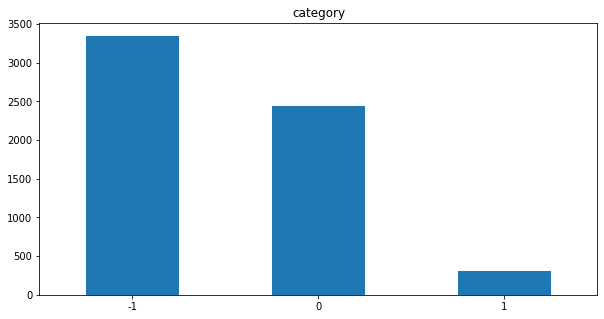

In [ ]:
bar = train.category.value_counts().plot.bar(rot=0, subplots=True, figsize=(10, 5))

## Hashtags 

In [ ]:
# ฟังก์ชันแยกแฮชแท็กออกจากทวีต
def Hashtags_Extract(x):
    hashtags = []
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#\S+',i)
        hashtags.append(ht)
    
    return hashtags

In [ ]:
# แยกแฮชแท็กออกจากทวีต
tws_h = Hashtags_Extract(train['description'])
print(tws_h)

[['#เรียนออนไลน์'], [], ['#แรงบันดาลใจ', '#ไลฟ์สไตล์', '#ความสำเร็จ', '#พัฒนาตัวเอง', '#LearningFromHome…'], ['#ฆ่าตัวตาย', '#เรียนออนไลน์\u200b'], ['#เปิดเรียนวันแรก', '#โรงเรียน', '#นักเรียน…'], [], [], ['#เรียนออนไลน์', '#dek64', '#dek65', '#dek66'], [], ['#เรียนออนไลน์'], [], [], ['#CabinFever', '#ภาวะเบื่อบ้าน'], ['#เปิดเรียน…'], [], ['#เรียนออนไลน์'], ['#มหาวิทยาลัย', '#สถาบันการศึกษา', '#ครู', '#อาจารย์', '#นักวิชาการ', '#บัณฑิต', '#การศึกษา'], ['#เรียนออนไลน์'], ['#เรียนออนไลน์'], ['#เรียนออนไลน์', '#มุ้งมิ้งคงไม่ชอบ'], [], [], [], ['#มธ', '#เรียนออนไลน์'], [], ['#เรียนออนไลน์'], [], ['#เรียนออนไลน์'], ['#เรียนออนไลน์', '#เกรดเทอมนี้ดีแน่นอน', '#คณิตครูเอก…'], ['#dek64', '#TCAS64', '#swu', '#TCAS', '#การศึกษาไทย', '#สอบเทียบ', '#สอบTOEIC', '#GATPAT', '#gatpat64'], [], ['#พลังสิบ'], [], ['#พลังสิบ', '#การศึกษา', '#การศึกษาไทย'], [], [], [], ['#เรียนออนไลน์'], [], [], ['#เรียนออนไลน์'], [], ['#การศึกษา'], ['#เรียนออนไลน์สไตล์เพชรพลอย', '#เรียนไม่เครียด…'], ['#การศึกษาไทย'], ['#รี

In [ ]:
# รวมแฮชแท็กเข้าด้วยกัน
tws_h_unnest = sum(tws_h, [])
print(tws_h_unnest)

['#เรียนออนไลน์', '#แรงบันดาลใจ', '#ไลฟ์สไตล์', '#ความสำเร็จ', '#พัฒนาตัวเอง', '#LearningFromHome…', '#ฆ่าตัวตาย', '#เรียนออนไลน์\u200b', '#เปิดเรียนวันแรก', '#โรงเรียน', '#นักเรียน…', '#เรียนออนไลน์', '#dek64', '#dek65', '#dek66', '#เรียนออนไลน์', '#CabinFever', '#ภาวะเบื่อบ้าน', '#เปิดเรียน…', '#เรียนออนไลน์', '#มหาวิทยาลัย', '#สถาบันการศึกษา', '#ครู', '#อาจารย์', '#นักวิชาการ', '#บัณฑิต', '#การศึกษา', '#เรียนออนไลน์', '#เรียนออนไลน์', '#เรียนออนไลน์', '#มุ้งมิ้งคงไม่ชอบ', '#มธ', '#เรียนออนไลน์', '#เรียนออนไลน์', '#เรียนออนไลน์', '#เรียนออนไลน์', '#เกรดเทอมนี้ดีแน่นอน', '#คณิตครูเอก…', '#dek64', '#TCAS64', '#swu', '#TCAS', '#การศึกษาไทย', '#สอบเทียบ', '#สอบTOEIC', '#GATPAT', '#gatpat64', '#พลังสิบ', '#พลังสิบ', '#การศึกษา', '#การศึกษาไทย', '#เรียนออนไลน์', '#เรียนออนไลน์', '#การศึกษา', '#เรียนออนไลน์สไตล์เพชรพลอย', '#เรียนไม่เครียด…', '#การศึกษาไทย', '#รีวิวมีเฮแซม', '#isranews…', '#isranews…', '#เรียนออนไลน์', '#เรียนออนไลน์', '#เรื่องจริง', '#การศึกษาไทย', '#สรุปเคมี', '#เรียนออนไล

In [ ]:
import nltk
# นับความถี่ของแฮชแท็ก
tws_freq = nltk.FreqDist(tws_h_unnest)
print(tws_freq)

# สร้างเป็น DataFrame เพื่อง่ายต่อการดู
df_tws = pd.DataFrame({'Hashtags':list(tws_freq.keys()),'Count':list(tws_freq.values())})
df_tws = df_tws.drop([104,174,334],axis=0)
# แฮชแท็กที่นิยมใช้กัน 10 อันดับ
df_tws.sort_values('Count', ascending = False).head(10).style.background_gradient(cmap='GnBu')

<FreqDist with 2161 samples and 11623 outcomes>


,Hashtags,Count
31,#การศึกษาไทย,3742
48,#การศึกษาฆ่าฉัน,1939
0,#เรียนออนไลน์,489
23,#การศึกษา,437
907,#การศึกษาไทยส้นตีน,423
98,#ความล้มเหลวของการศึกษาไทย,313
922,#เรียนออนไลน์เราจะตายกันหมด,109
12,#dek65,71
1591,#ไม่เรียนออนไลน์แล้วอิสัส,61
101,#Dek64,45


## Emoji 

In [ ]:
# Emoji (pos, neg, neu)
pos_dft = train.loc[train['category'] == '1']
neg_dft = train.loc[train['category'] == '-1'] 
neu_dft = train.loc[train['category'] == '0']

### All emoji

In [ ]:
# all
chars_count = {}

def append_chars_count(text):
    for char in list(set(text)): # I count repeated character in one review as one
        chars_count[char] = chars_count.get(char, 0) + 1
    
train['description'].map(append_chars_count)

# make it into datarame so we can sort it easily
df_chars = pd.DataFrame()
df_chars['char'] = list(chars_count.keys())
df_chars['count'] = list(chars_count.values())
df_chars = df_chars.sort_values("count", ascending = False).reset_index(drop = True)
# exclude chracters
exclude_chars = ['\n', ' ', '\\', '°', '.', "'", '"', '-','ั','ิ','ู','็','!','“','”','🏼',
                 '-', ')', '(',"♀",'ุ','่',':', ';',',', '\u200b', '️', '/', '\xa0','▶',
                 "?", "&", '’', '~', '*', '%', '_','#', '=', '@', ']','+','🏻',' '," ",'\t',
                 'ึ','ี',"ื","์","๊","้","‘",'\n', ' ', '\\', '°', '.', "'", '"', '-', '!', '-', ')', '(', ':', ';',
                ',', '\u200b', '️', '/', '\xa0', "?", "&", '’', '~', '+', '*', '%', '_','^', 
                 '#', '=', '@', ']', '[', 'ี', "่", '้', 'ั','…', 'ิ', '์', 'ื', 'ู', 'ุ', '็', 'ึ', '๊',
                 '฿', '”', '“', " ", '|', 'ํ', '๋', 'ฯ','—','‘','🇭','🇹',"",'♀','‼'] # from manual observation 

mask = df_chars['char'].map(lambda x: not (x.isalnum() or str(x) in exclude_chars))
df_chars_special = df_chars.loc[mask]
df_chars_special = df_chars_special.drop([164],axis=0)
df_chars_special.head(10).style.background_gradient(cmap='Oranges')

,char,count
147,😭,56
152,🙄,40
153,😢,38
155,🥲,34
156,🥺,32
159,🙏,26
161,😔,21
163,‍,21
165,🙂,18
168,🤔,14


### positive 🙂

In [ ]:
# pos
chars_count = {}

def append_chars_count(text):
    for char in list(set(text)): # I count repeated character in one review as one
        chars_count[char] = chars_count.get(char, 0) + 1
    
pos_dft['description'].map(append_chars_count)

# make it into datarame so we can sort it easily
df_chars = pd.DataFrame()
df_chars['char_pos'] = list(chars_count.keys())
df_chars['count_pos'] = list(chars_count.values())
df_chars = df_chars.sort_values("count_pos", ascending = False).reset_index(drop = True)
# exclude chracters
exclude_chars = ['\n', ' ', '\\', '°', '.', "'", '"', '-','ั','ิ','ู','็','!','“','”','🏼',
                 '-', ')', '(',"♀",'ุ','่',':', ';',',', '\u200b', '️', '/', '\xa0','▶',
                 "?", "&", '’', '~', '*', '%', '_','#', '=', '@', ']','+','🏻',' '," ",'\t',
                 'ึ','ี',"ื","์","๊","้","‘",'\n', ' ', '\\', '°', '.', "'", '"', '-', '!', '-', ')', '(', ':', ';',
                ',', '\u200b', '️', '/', '\xa0', "?", "&", '’', '~', '+', '*', '%', '_','^', 
                 '#', '=', '@', ']', '[', 'ี', "่", '้', 'ั','…', 'ิ', '์', 'ื', 'ู', 'ุ', '็', 'ึ', '๊',
                 '฿', '”', '“', " ", '|', 'ํ', '๋', 'ฯ','—','‘','🇭','🇹',"",'♀','‼'] # from manual observation 

mask = df_chars['char_pos'].map(lambda x: not (x.isalnum() or str(x) in exclude_chars))
df_chars_special = df_chars.loc[mask]
df_chars_special.head(10).style.background_gradient(cmap='Greens')

,char_pos,count_pos
139,😊,8
146,🥰,5
147,✌,5
150,👍,4
151,😆,4
152,🤣,4
153,🥺,4
155,😀,3
156,😍,3
157,😋,3


### negative ☹️

In [ ]:
## neg

chars_count = {}

def append_chars_count(text):
    for char in list(set(text)): # I count repeated character in one review as one
        chars_count[char] = chars_count.get(char, 0) + 1
        
neg_dft['description'].map(append_chars_count);

# make it into datarame so we can sort it easily
df_chars = pd.DataFrame()
df_chars['char_neg'] = list(chars_count.keys())
df_chars['count_neg'] = list(chars_count.values())
df_chars = df_chars.sort_values("count_neg", ascending = False).reset_index(drop = True)
# exclude chracters
exclude_chars = ['\n', ' ', '\\', '°', '.', "'", '"', '-','ั','ิ','ู','็','!','“','”','🏼'," ",' ',
                 '-', ')', '(',"♀",'ุ','่',':', ';',',', '\u200b', '️', '/', '\xa0',
                 "?", "&", '’', '~', '*', '%', '_','#', '=', '@', ']','+','🏻',' '," ",'\t',
                 'ึ','ี',"ื","์","๊","้","‘",'\n', ' ', '\\', '°', '.', "'", '"', '-', '!', '-', ')', '(', ':', ';',
                ',', '\u200b', '️', '/', '\xa0', "?", "&", '’', '~', '+', '*', '%', '_','^', 
                 '#', '=', '@', ']', '[', 'ี', "่", '้', 'ั','…', 'ิ', '์', 'ื', 'ู', 'ุ', '็', 'ึ', '๊',
                 '฿', '”', '“', " ", '|', 'ํ', '๋', 'ฯ','—','‘','🇭','🇹',"",'♀','‼'] # from manual observation 

mask = df_chars['char_neg'].map(lambda x: not (x.isalnum() or str(x) in exclude_chars))
df_chars_special = df_chars.loc[mask]
df_chars_special.head(10).style.background_gradient(cmap='Reds')

,char_neg,count_neg
137,😭,49
147,😢,28
149,🙄,23
152,🥲,18
153,😔,17
155,🥺,16
160,🙂,10
161,🖕,10
162,😿,10
163,‍,10


### neutral 😐

In [ ]:
## neu
chars_count = {}

def append_chars_count(text):
    for char in list(set(text)): # I count repeated character in one review as one
        chars_count[char] = chars_count.get(char, 0) + 1
        
neu_dft['description'].map(append_chars_count);

# make it into datarame so we can sort it easily
df_chars = pd.DataFrame()
df_chars['char_neu'] = list(chars_count.keys())
df_chars['count_neu'] = list(chars_count.values())
df_chars = df_chars.sort_values("count_neu", ascending = False).reset_index(drop = True)
# exclude chracters
exclude_chars = ['\n', ' ', '\\', '°', '.', "'", '"', '-','ั','ิ','ู','็','!','“','”','🏼','╰','︵',
                 '-', ')', '(',"♀",'ุ','่',':', ';',',', '\u200b', '️', '/', '\xa0',
                 "?", "&", '’', '~', '*', '%', '_','#', '=', '@', ']','+','🏻',' '," ",'\t',
                 'ึ','ี',"ื","์","๊","้","‘",'\n', ' ', '\\', '°', '.', "'", '"', '-', '!', '-', ')', '(', ':', ';',
                ',', '\u200b', '️', '/', '\xa0', "?", "&", '’', '~', '+', '*', '%', '_','^', 
                 '#', '=', '@', ']', '[', 'ี', "่", '้', 'ั','…', 'ิ', '์', 'ื', 'ู', 'ุ', '็', 'ึ', '๊','♂',
                 '฿', '”', '“', " ", '|', 'ํ', '๋', 'ฯ','—','‘','🇭','🇹',"",'♀','‼'] # from manual observation 

mask = df_chars['char_neu'].map(lambda x: not (x.isalnum() or str(x) in exclude_chars))
df_chars_special = df_chars.loc[mask]
df_chars_special.head(10).style.background_gradient(cmap='Blues')


,char_neu,count_neu
151,🙄,17
153,🥲,16
155,🙏,15
156,😂,14
159,🥺,12
160,😢,9
162,‍,9
164,🤔,8
166,🙂,8
170,😭,6


## Word cloud

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import seaborn as sn
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import pickle as p
import plotly
import plotly.graph_objs as go
import urllib
import requests
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont


### positive 🙂

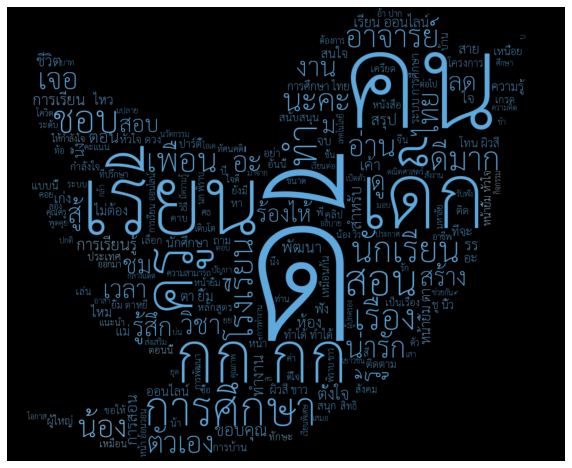

In [ ]:
#pos
path = "/content/Sarabun-Thin.ttf" # ตั้ง path ไปหา font ที่เราต้องการใช้แสดงผล
#convert list to string and generate
my_list = pos_dft['text']
unique_string =(" ").join(my_list )

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(font_path=path,background_color='black', height=1500, width=4000,mask=Mask,regexp=r"[ก-๙a-zA-Z']+").generate(unique_string)
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.savefig("positive"+".png", bbox_inches='tight')
plt.axis('off')
plt.show()

### negative ☹️

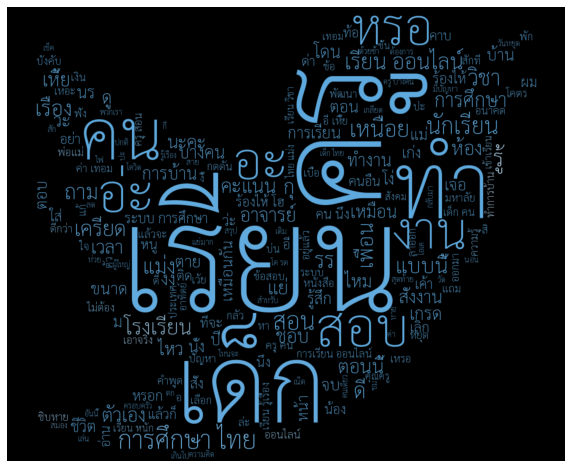

In [ ]:
#neg
path = "/content/Sarabun-Thin.ttf" # ตั้ง path ไปหา font ที่เราต้องการใช้แสดงผล
#convert list to string and generate
my_list = neg_dft['text']
unique_string =(" ").join(my_list )

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(font_path=path,background_color='black', height=1500, width=4000,mask=Mask,regexp=r"[ก-๙a-zA-Z']+").generate(unique_string)
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.savefig("negative"+".png", bbox_inches='tight')
plt.axis('off')
plt.show()

### neutral 😐

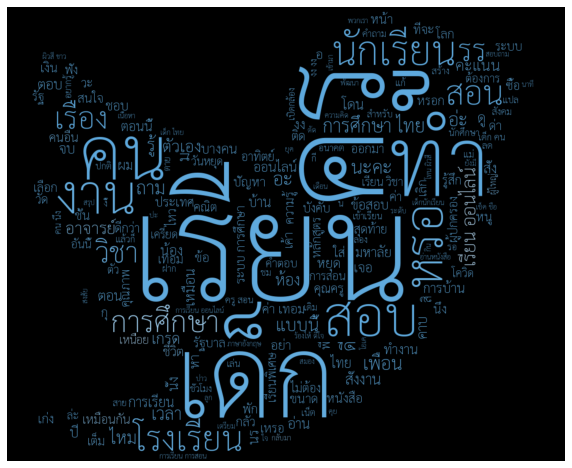

In [ ]:
#neu
path = "/content/Sarabun-Thin.ttf" # ตั้ง path ไปหา font ที่เราต้องการใช้แสดงผล
#convert list to string and generate
my_list = neu_dft['text']
unique_string =(" ").join(my_list )

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(font_path=path,background_color='black', height=3000, width=8000,mask=Mask,regexp=r"[ก-๙a-zA-Z']+").generate(unique_string)
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.savefig("neutral"+".png", bbox_inches='tight')
plt.axis('off')
plt.show()

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.corpus import thai_stopwords
stopwords = thai_stopwords()

tfidf = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words = stopwords)

tfidf_matrix = tfidf.fit_transform(train['text'].values.astype('U'))

df_tfidf = pd.DataFrame(tfidf_matrix.todense(),columns=tfidf.get_feature_names(), index=train["text"]) # แสดงผลด้วย dataframe

df_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['กคน', 'กคร', 'กครา', 'กคราว', 'กจะ', 'กช', 'กต', 'กท', 'กทาง', 'กน', 'กระท', 'กระน', 'กระไร', 'กล', 'กว', 'กส', 'กหน', 'กอ', 'กอย', 'กำล', 'กเม', 'กแห', 'กๆ', 'ขณะท', 'ขณะน', 'ขณะหน', 'ขณะเด', 'คงอย', 'คร', 'ครบคร', 'ครบถ', 'คราท', 'คราน', 'คราวก', 'คราวท', 'คราวน', 'คราวหน', 'คราวหล', 'คราวโน', 'คราหน', 'คล', 'งก', 'งกระน', 'งกล', 'งกว', 'งข', 'งคง', 'งคน', 'งครา', 'งคราว', 'งง', 'งจ', 'งจน', 'งจะ', 'งจาก', 'งต', 'งท', 'งน', 'งบ', 'งปวง', 'งมวล', 'งละ', 'งว', 'งส', 'งหน', 'งหมด', 'งหมาย', 'งหล', 'งหลาย', 'งอย', 'งเก', 'งเคย', 'งเน', 'งเป', 'งเม', 'งแก', 'งแต', 'งแม', 'งแล', 'งโง', 'งโน', 'งใด', 'งใหญ', 'งไง', 'งได', 'งไหน', 'งๆ', 'งๆจ', 'จก', 'จจ', 'จนกระท', 'จนกว', 'จนขณะน', 'จนถ', 'จนท', 'จนบ', 'จนเม', 'จนแม', 'จร', 'จรดก', 'จวนเจ', 'จวบก', 'จส', 'จสมบ', 'จะได', 'จากน', 'จำเป', 'จแล', 'ฉะ

,eng,ep,gat,onet,passion,กก,กข,กค,กคร,กคะแนน,...,ไมค,ไล,ไลน,ไว,ไห,ไหนจะ,ไหม,ไหว,ไอ,ไอแพด
text,,,,,,,,,,,,,,,,,,,,,
กระแส ดีมานด์ ipad รุ่น ต่ำ อย่า ว่าแต่ หน้า ร้าน หา ขนาด เว็บ apple store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ภูมิศาสตร์ ประวัติศาสตร์ ทวีป เหมือนกัน ชื่น ใจจริง ค้น กูเกิล บ้าน พี่ หน่วง,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
เคล็ดลับ การเรียน ออนไลน์ มีประสิทธิภาพ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
อ่าน ข่าว นิสิต เครียด ฐานะ คน จบ ครู การสอน elearning distance learn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
เปิดเรียน กทม เรียน ออนไลน์ youtube,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
เรียนจบ วุฒิ เข้าเรียน เทอม ทำ ครู เด็ก คน เด็ก จ้าง คนอื่น นั่ง เรียน ออนไลน์ คุณภาพ ครูผู้สอน เหมือนกัน,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
เด็ก กี่ คน หลุด ออกจาก ระบบ การศึกษา อะ การศึกษา เข้าถึง อะ โดยที่ สวัสดิการ ถ้วน หน้าที่ กรอ กยศ ทุน ทำ เอกสาร อะ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ครู บางท่าน ใช้งาน เด็ก มากเกินไป เรื่อง เด็ก คอมพิวเตอร์ เก่ง โดน ครู พิม งาน ปฏิเสธ คน คน เรื่อง การทำงาน ทำ ผู้ใหญ่ เอ็นดู,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# save the TFIDF and label

In [ ]:
import pickle

## save the TFIDF to disk
fn_TFIDF_new = 'TFIDF_new.pkl'
pickle.dump(tfidf_matrix, open(fn_TFIDF_new, 'wb'))

## save the category to disk
fn_label_new = 'label_new.pkl'
pickle.dump(train.category, open(fn_label_new, 'wb'))

# **Model & Validation process** ⚙️🔨

ขั้นตอนในส่วนของโมเดล และการวัดประสิทธิภาพโดยแบ่งตามการปรับข้อมูลในสมดุล (Imbalance data) ดังนี้  
🤔 [Before Imbalanced Data](https://colab.research.google.com/drive/1uCwIr0NG6lFQWsUcLsyIhDZglvBeEzGb?usp=sharing)    
😋 [Random under-sampling](https://colab.research.google.com/drive/1sco55feHk1PvLQziRXfYOSW6mshOKahp)   
😢 [Bagging of under-sampling subsets](https://colab.research.google.com/drive/1gtrufeTDay8-B58a25PLZmwgmx5mAnnq#scrollTo=K4QiAuWX4A-Y)   
🤪 [Random over-sampling](https://colab.research.google.com/drive/1oFTKNN7ZtYG3bo8dZv-5z7ypG6f3mXPt)   
😵 [Synthetic Minority Over-sampling Technique (SMOTE)](https://colab.research.google.com/drive/1OlQn2762_-r2MjjD-8AKet0zq8fLZtG7)